In [1]:
%pylab inline

def mysavefig(filename):
    plt.tight_layout()
    plt.savefig("../images/ds2/"+filename, bbox_inches="tight", dpi=600)
    return

Populating the interactive namespace from numpy and matplotlib


0.037500000000000006
1.875
1.875
1.7561038871575303


1.4149742943188937

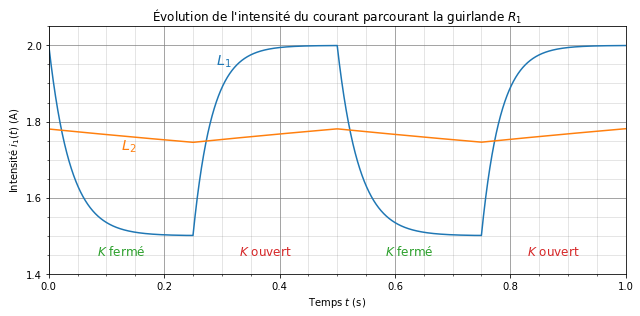

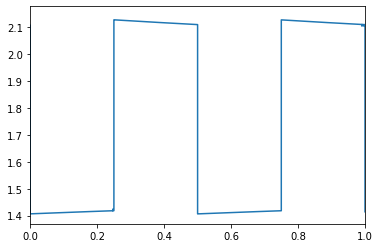

In [213]:
from scipy.integrate import odeint
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
#############################
# PARAMÈTRES DE LA RÉSOLUTION
#############################
t0 = -5                   # bornes de l'intervalle de résolution
tf = 1.5
dt = 1e-5                # pas de temps en secondes
n  = int((tf-t0)/dt + 1) # nombre de points
t = np.linspace(t0,tf,n) # temps en seconde

def i1(L=.1):
    ##########################
    # PARAMÈTRES DU CIRCUIT RL
    ##########################
    omega = 2*np.pi*2  # pulsation de l'interrupteur en s^-1
    R = 2              # résistance des guirlandes
    r = 1              # résistance interne du générateur
    E = 6             # f.é.m. du générateur
    i0  = 1.75          # CI : intensité du courant dans la bobine
    V0  = [i0]

    tau1 = L / (R + r)
    I1   = E / (R + r)
    tau2 = L * (1 + r / R) / (R + 2 * r)
    print(tau2)
    I2   = E / (R + 2 * r)

    ###############################################
    # FONCTION ASSOCIÉE À L'ÉQUATION DIFFÉRENTIELLE
    ###############################################
    def guirlande(V, t):
        K = np.sign(np.sin(omega * t))
        x = V[0]
        if K <= 0:
            dx = - x / tau1 + I1 / tau1
        else:
            dx = - x / tau2 + I2 / tau2
        dV = [dx]
        return dV
    
    V = odeint(guirlande, V0, t) #
    i = V[:,0]            # récupération des valeurs de i(t)
    return i

##########################
# REPRÉSENTATION GRAPHIQUE
##########################
fig, ax = plt.subplots(figsize=(9, 4.5))

i = i1(L=.1)
ax.plot(t, i, label="$L_1$")

i = i1(L=5)
ax.plot(t, i, label="$L_2$")

ax.set_xlim(0,1)
ax.set_ylim(1.4,2.05)
ax.set_xlabel("Temps $t$ (s)")
ax.set_ylabel("Intensité $i_1(t)$ (A)")
ax.set_title("Évolution de l'intensité du courant parcourant la guirlande $R_1$")
# Change major ticks to show every .2
ax.xaxis.set_major_locator(MultipleLocator(.2))
ax.yaxis.set_major_locator(MultipleLocator(.2))
# Change minor ticks to show every 5. (.2/4 = .05)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(which='major', color='gray', alpha=75, lw=1)
ax.grid(which='minor', color='gray', alpha=.2, lw=1)

ax.annotate("$L_1$", xy=(.29,1.95), fontsize="x-large", color="C0")
ax.annotate("$L_2$", xy=(.125,1.725), fontsize="x-large", color="C1")

ax.annotate("$K$ fermé", xy=(.25/2,1.45), fontsize="large", color="C2",ha="center")
ax.annotate("$K$ ouvert", xy=(.75/2,1.45), fontsize="large", color="C3",ha="center")
ax.annotate("$K$ fermé", xy=(1.25/2,1.45), fontsize="large", color="C2",ha="center")
ax.annotate("$K$ ouvert", xy=(1.75/2,1.45), fontsize="large", color="C3",ha="center")

mysavefig("guirlande.pdf")

plt.figure()
L = 5
i = i1(L=L)

t = t[50:]
i = i[50:]
u = L * np.diff(i) / np.diff(t)
i2 = (u + R*i[:-1]) / R
plt.plot(t[:-1],i2)
plt.xlim(0,1)


l = [val for val in i2 if val < 2]
mean(l)

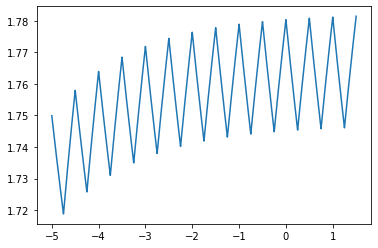

In [214]:
n = 
plt.plot(t,i)

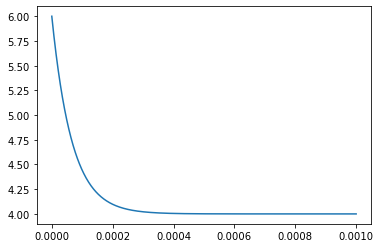

In [107]:
import numpy as np

dt = 1e-6                 # pas de temps en seconde
t  = np.arange(0,1e-3,dt) # liste des instants tk
N  = len(t)               # nombre de valeurs tk

R1   = 5e3                # résistance R1 en ohms
R2   = 10e3               # résistance R2 en ohms
L    = 1.0                # inductance L en henry
E    = 12                 # f.é.m. en volts
tau1 = L / (R1 + R2)      # temps caractéristique tau1 en secondes
uinf = E * R1 / (R1 + R2) # valeur de u(t) en régime permanent

u = np.zeros(N)   # création d'une liste de 0 de même longueur que t
u[0] = R1 * E / R2        # condition initiale
for k in range(N-1):      # calcul des valeurs u(tk)
    # À compléter
    
    u[k+1] = u[k] + dt / tau1 * (uinf - u[k])

plt.plot(t, u)

0.0003333333333333334


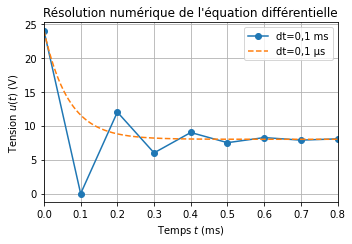

In [218]:
R1   = 10e3                # résistance R1 en ohms
R2   = 5e3               # résistance R2 en ohms
L    = 1.0                # inductance L en henry
E    = 12                 # f.é.m. en volts
tau1 = L / (R1 + R2)      # temps caractéristique tau1 en secondes
uinf = E * R1 / (R1 + R2) # valeur de u(t) en régime permanent

def u_euler(dt):
    t  = np.arange(0,2e-3,dt) # liste des instants tk
    N  = len(t)               # nombre de valeurs tk

    u = np.zeros(N)   # création d'une liste de 0 de même longueur que t
    u[0] = R1 * E / R2        # condition initiale
    for k in range(N-1):      # calcul des valeurs u(tk)
        u[k+1] = u[k] + dt / tau1 * (uinf - u[k])
    return t, u

plt.figure(figsize=(5,3.5))

t, u = u_euler(1e-4)
plt.plot(t*1e3,u, "o-",label="dt=0,1 ms")

t, u = u_euler(1e-7)
plt.plot(t*1e3,u, "--",label="dt=0,1 µs")

plt.xlim(0,0.8)
#plt.ylim(0,6.5)
plt.grid(True)
plt.xlabel("Temps $t$ (ms)")
plt.ylabel("Tension $u(t)$ (V)")
plt.title("Résolution numérique de l'équation différentielle")
plt.legend()
mysavefig("surtension_euler.pdf")
print(5*tau1)

1.6e-07
0.5443310539518174


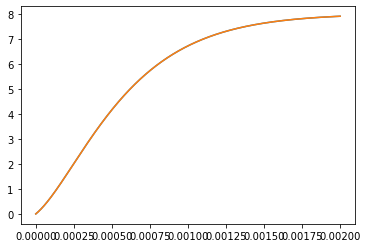

In [219]:
from scipy.integrate import odeint

t  = np.linspace(0,2e-3,10000)

R1   = 10e3               # résistance R1 en ohms
R2   = 5e3                # résistance R2 en ohms
L    = 1.0                # inductance L en henry
E    = 12                 # f.é.m. en volts
C    = 7.46e-8
C = 1.6e-7
print(4*L/R2**2)

omega0 = np.sqrt((R1+R2)/R1/L/C)
Q = np.sqrt((R1+R2)*R1*L*C) / (L + R1*R2*C)
print(Q)
Q = 0.5
V0 = [0,E/C/(R1+R2)]

def rlc(V, t):
    x,y = V
    dx = y
    dy = -omega0**2 * x - omega0/Q * y + E/L/C
    dV = [dx, dy]
    return dV

def rlc_ana(t):
    A = E/C/(R1+R2) - E * R1 * omega0 / (R1 + R2)
    B = -R1 * E / (R1 + R2)
    return (A*t + B) * np.exp(-omega0*t) + R1*E/(R1+R2)

V = odeint(rlc, V0, t)
u = V[:,0]

#plt.plot(t, np.sign(np.sin(omega*t)))
plt.plot(t,u)
plt.plot(t, rlc_ana(t))

In [210]:
omega0

3061.8621784789725

In [211]:
1/np.sqrt(L*C)

2500.0